# Support Vector Regression from SKLearn
# ----------------------------------------------------------------------------------------------------------------------------------------------------
## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error

# ----------------------------------------------------------------------------------------------------------
### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).<br>
Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [2]:
cancer_df = pd.read_csv('./Dataset/Breast Cancer Dataset/Breast_Cancer_Data.csv')
cancer_df['diagnosis'].replace(['B', 'M'], [0, 1], inplace = True)
cancer_df['label'] = cancer_df.diagnosis
cancer_df.drop([cancer_df.columns[0], cancer_df.columns[1], cancer_df.columns[32]], axis = 1, inplace = True)

Splitting the dependent and Independent Variables

In [3]:
cancer_data = cancer_df.iloc[:,0:1].values
cancer_label = cancer_df.iloc[:,-1].values
cancer_label = cancer_label.reshape(cancer_label.shape[0],1)

### Normalising the data
Scaling the features.<br>
The scaling is also know as standardisation/normalisation. Standardization is a process for making a dataset fit for the training of the model. In this prosess we make a dataset whose value lies between zero mean and one standard deviation. The Data Comming out from this process is smooth for the curves and fitting a model.

In [4]:
sc_data = StandardScaler()
sc_label = StandardScaler()
cancer_data = sc_data.fit_transform(cancer_data)
cancer_label = sc_label.fit_transform(cancer_label)
# y=y.reshape(y.shape[0])

### Train Test Split

In [5]:
train_cancer, test_cancer, train_label, test_label = train_test_split(cancer_data, cancer_label, test_size = 0.25)

Fitting the SVR to data

In [6]:
Support_cancer = SVR()
Support_cancer.fit(train_cancer,train_label)

/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the result
#### Training Data

In [7]:
train_predict = Support_cancer.predict(train_cancer)
train_mse = mean_squared_error(train_label,train_predict)
train_mae = mean_absolute_error(train_label,train_predict)
train_score = (round(Support_cancer.score(train_label,train_predict)))*100

print("----------------------------------------------------------\n")
print("Mean Square Error Training Data ; {}\nMean Absolute Error Training Data : {}\nScore Value of Training Data : {}".format(train_mse,train_mae,train_score))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Mean Square Error Training Data ; 0.3992424055351768
Mean Absolute Error Training Data : 0.3217756670254228
Score Value of Training Data : 100.0

----------------------------------------------------------


#### Testing Data

In [8]:
test_predict = Support_cancer.predict(test_cancer)
test_mse = mean_squared_error(test_label,test_predict)
test_mae = mean_absolute_error(test_label,test_predict)
test_score = (round(Support_cancer.score(test_label,test_predict)))*100

print("----------------------------------------------------------\n")
print("Mean Square Error Testing Data ; {}\nMean Absolute Error Testing Data : {}\nScore Value of Testing Data : {}".format(test_mse,test_mae,test_score))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Mean Square Error Testing Data ; 0.46526720288488416
Mean Absolute Error Testing Data : 0.34775760417926677
Score Value of Testing Data : 0.0

----------------------------------------------------------


### Visualising the SVR curve
#### Training Data

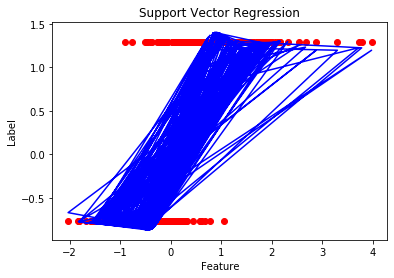

In [9]:
plt.scatter(train_cancer,train_label,color='red')
plt.plot(train_cancer,Support_cancer.predict(train_cancer),color='blue')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Support Vector Regression')
plt.show()

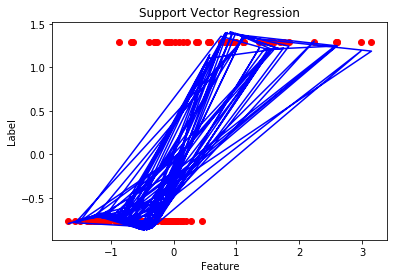

In [10]:
plt.scatter(test_cancer,test_label,color='red')
plt.plot(test_cancer,Support_cancer.predict(test_cancer),color='blue')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Support Vector Regression')
plt.show()

### Ploting The Learning Curve of the model Function
The Function plots the learning curve of the model over the training score and the cross-validation score.<br>
Funtion to plot Learning curve from sklearn (https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [11]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Ploting the Learning Curve over training data
ploting the learning curve for the simple linear model which works over data of degree 1.

/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

<module 'matplotlib.pyplot' from '/home/daku/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

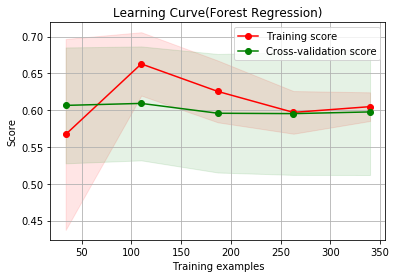

In [12]:
plot_learning_curve(Support_cancer,"Learning Curve(Forest Regression)",train_cancer,train_label,cv=5)

### Ploting the Learning Curve over testing data
ploting the learning curve for the simple linear model which works over data of degree 1.

/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daku/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

<module 'matplotlib.pyplot' from '/home/daku/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

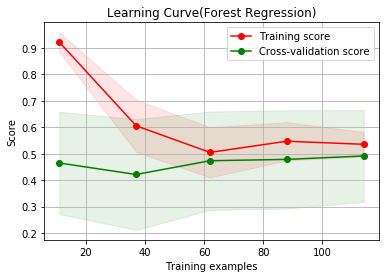

In [13]:
plot_learning_curve(Support_cancer,"Learning Curve(Forest Regression)",test_cancer,test_label,cv=5)